In [11]:
import pandas as pd
import numpy as np
import os

years_DepEP = []

# loop through the csvs in data/DepEP and add the dataframe to the list
for file in os.listdir('data/DepEP'):
    if file.endswith('.csv'):
        data = pd.read_csv('data/DepEP/' + file)
        columns = data.columns

        # convert the second, third, and fourth columns to numbers
        data[columns[1]] = pd.to_numeric(data[columns[1]], errors='coerce')
        data[columns[2]] = pd.to_numeric(data[columns[2]], errors='coerce')
        data[columns[3]] = pd.to_numeric(data[columns[3]], errors='coerce')

        years_DepEP.append(data)

# print some info about the dataframes
len(years_DepEP), years_DepEP[0].shape, years_DepEP[0].columns

(23,
 (46, 4),
 Index(['Department of Environmental Protection 2000 Revenues', ' 1998 Actual',
        ' 1999 Estimated', ' 2000 Estimated'],
       dtype='object'))

In [12]:
years_DepEP[0][' 1998 Actual'].sum()

sums = []

# loop through the data and sum the values in the second column in each
for year in years_DepEP:
    sums.append(year[year.columns[1]].sum())

sums

[92870,
 98178,
 101864,
 87857,
 116839.0,
 105399,
 127820.0,
 118534,
 138993,
 155989,
 144541,
 158757,
 143841,
 145429,
 136194.0,
 147103.0,
 183043,
 136928,
 153732,
 153846,
 149535,
 145024,
 135267]

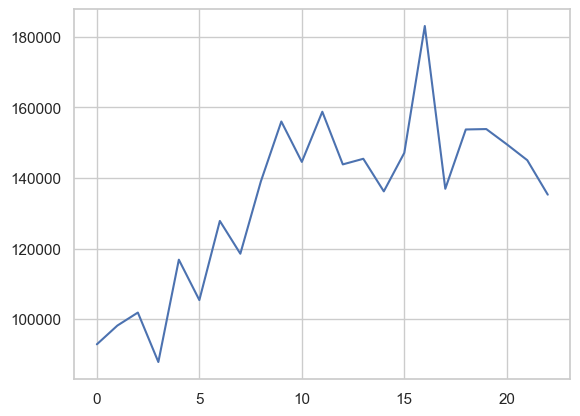

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# configure seaborn
sns.set(style='whitegrid')

# plot the sums
plt.plot(sums)
plt.show()